### GJS Output Volume Visualization

In [ ]:
# 6. Plot volume
import numpy as np
import pyvista as pv

pv.set_jupyter_backend("html")

pred_3d = np.load("/home/tommytang111/gap-junction-segmentation/outputs/volumetric_results/unet_h1qrqboc/sem_dauer_2_s000-972/volume_downsampled.npy")
pred_3d_ = np.transpose(pred_3d, (2, 1, 0))
#print(np.unique(pred_3d_, return_counts=True))

# wrap into a pyvista UniformGrid
grid = pv.wrap(pred_3d_)
contour = grid.contour(isosurfaces=[255])

# Volume rendering (interactive)
p = pv.Plotter(notebook=True)
p.add_mesh(contour, color="#02EBFC", show_scalar_bar=False)
p.set_background("black")
p.camera_position = "iso"
p.enable_eye_dome_lighting()        
p.show_axes()                         
#p.export_html("/home/tommytang111/gap-junction-segmentation/html_objects/SEM_Dauer_1_3D.html")
p.show()

EmbeddableWidget(value='<iframe srcdoc="<!DOCTYPE html>\n<html>\n  <head>\n    <meta http-equiv=&quot;Content-…

### Exploring point and isosurface rendering and overlays 

In [ ]:
import pyvista as pv
import numpy as np 
from skimage.measure import block_reduce

#Load volumes
pred = np.load("/home/tommytang111/gap-junction-segmentation/outputs/volumetric_results/unet_h1qrqboc/sem_dauer_1_s000-850/volume_block_downsampled.npy")
points = np.load("/home/tommytang111/gap-junction-segmentation/gj_point_annotations/sem_dauer_1_GJs_block_downsampled.npy")
point_entities = np.load("/home/tommytang111/gap-junction-segmentation/gj_point_annotations/sem_dauer_1_GJs_entities_downsampled.npy")

#Block reduce
pred_ = block_reduce(pred, block_size=(1,2,2), func=np.max)
points_ = block_reduce(points, block_size=(1,2,2), func=np.max)
point_entities_ = block_reduce(point_entities, block_size=(1,2,2), func=np.max)

#Experimenting with overlaying objects
print(pred_.shape)
print(points_.shape)
print(point_entities_.shape)
#smaller_pred_3d = pred_3d[:200, 256:768, 256:768]
# print(np.unique(pred_3d, return_counts=True))
# print(np.unique(smaller_pred_3d, return_counts=True))

#Convert to list of points
points_list = np.argwhere(points_ == 255)

#Transform pred into isosurface
grid = pv.wrap(pred_)
contour = grid.contour(isosurfaces=[255])

#Transform point_entities into isosurface
grid2 = pv.wrap(point_entities_)
contour2 = grid2.contour(isosurfaces=[255])

#Transform points into glyphs/spheres
point_cloud = pv.PolyData(points_list)
lowpoly = pv.Sphere(radius=2.0, theta_resolution=8, phi_resolution=8)  # low triangle count
spheres = point_cloud.glyph(scale=False, geom=lowpoly, orient=False) #pv.Sphere(radius=2)
spheres.clear_data()  # drop data arrays to shrink fil

#Plotting
pv.set_jupyter_backend("html")
pv.global_theme.background = 'black'
pv.force_float=False
p = pv.Plotter(notebook=True, shape=(2, 2))
#Predictions
p.subplot(0, 0)
p.add_mesh(contour, color="#02EBFC", show_scalar_bar=False)
p.add_title("Predictions", color="white", font_size=26)
p.enable_eye_dome_lighting()
#Point Entities
p.subplot(0, 1)
p.add_mesh(contour2, color="#BF35FF", show_scalar_bar=False)
p.add_title("Point Entities", color="white", font_size=26)
p.enable_eye_dome_lighting()
#Point + Point Entities Overlay
p.subplot(1, 0)
p.add_mesh(spheres, color="#FA9017", show_scalar_bar=False) #IT SEEMS LIKE THERE IS ALWAYS A PROBLEM EVERY TIME I USE MORE THAN 2 SUBPLOTS
p.add_mesh(contour2, color="#BF35FF", opacity=0.5, show_scalar_bar=False)
p.add_title("Point + Point Entities", color="white", font_size=26)
p.enable_eye_dome_lighting()
#Predictions + Point Entities Overlay
p.subplot(1, 1)
p.add_mesh(contour, color="#02EBFC", opacity=0.5, show_scalar_bar=False)
p.add_mesh(contour2, color="#BF35FF", opacity=0.5, show_scalar_bar=False)
p.add_title("Predictions + Point Entities", color="white", font_size=26)
p.enable_eye_dome_lighting()
#Other plot settings
# p.set_background("black")
# p.show_axes()
# p.enable_eye_dome_lighting()
#p.link_views()
p.export_html("/home/tommytang111/gap-junction-segmentation/html_objects/SEM_Dauer_1_point_entities_overlay.html")
p.show()

In [4]:
#Plotting only combined overlay
pv.set_jupyter_backend("html")
pv.global_theme.background = 'black'
pv.force_float=False

p = pv.Plotter(notebook=True)
#p.add_mesh(contour, color="#02EBFC", opacity=0.5,show_scalar_bar=False)
p.add_mesh(contour2, color="#BF35FF", opacity=0.5, show_scalar_bar=False)
p.add_mesh(spheres, color="#FA9017", show_scalar_bar=False, smooth_shading=False)
p.add_text("Prediction + Point Entity + Points Overlay", position=(0, 0.5), color="#02EBFC", font_size=30)
p.enable_eye_dome_lighting()
p.show_axes()
p.export_html("/home/tommytang111/gap-junction-segmentation/html_objects/SEM_Dauer_2_point_entities_overlay_only2.html")
p.show()

EmbeddableWidget(value='<iframe srcdoc="<!DOCTYPE html>\n<html>\n  <head>\n    <meta http-equiv=&quot;Content-…

In [4]:
np.unique(points)

array([  0, 255], dtype=uint8)

In [3]:
import pyvista as pv
import numpy as np 

#Load volumes
pred = np.load("/home/tommytang111/gap-junction-segmentation/outputs/volumetric_results/unet_h1qrqboc/sem_dauer_2_s000-972/volume_block_downsampled.npy")
points = np.load("/home/tommytang111/gap-junction-segmentation/gj_point_annotations/sem_dauer_2_GJs_block_downsampled.npy")

#Experimenting with overlaying objects
print(pred.shape)
print(points.shape)
#smaller_pred_3d = pred_3d[:200, 256:768, 256:768]
# print(np.unique(pred_3d, return_counts=True))
# print(np.unique(smaller_pred_3d, return_counts=True))

#Convert to list of points
points_list = np.argwhere(points == 255)

#Transform pred into isosurface
grid = pv.wrap(pred)
contour = grid.contour(isosurfaces=[255])

# Create a PolyData object from coordinates
point_cloud = pv.PolyData(points_list)

# Generate spheres at each point (world-space size)
spheres = point_cloud.glyph(
    scale=False,           # don't scale by data
    geom=pv.Sphere(radius=2.0),  # adjust radius for desired size
    orient=False
)

# Plot
pv.set_jupyter_backend("html")
p = pv.Plotter(notebook=True)
p.add_mesh(spheres, color="#FA9017", show_scalar_bar=False)
p.add_mesh(contour, color="#02EBFC", opacity=0.3, show_scalar_bar=False)
p.enable_eye_dome_lighting()
p.show()

(973, 1041, 1170)
(973, 1041, 1170)


/home/tommytang111/.conda/envs/gap_junction/lib/python3.10/site-packages/pyvista/core/utilities/points.py:79: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


EmbeddableWidget(value='<iframe srcdoc="<!DOCTYPE html>\n<html>\n  <head>\n    <meta http-equiv=&quot;Content-…

In [16]:
coords = np.argwhere(gj_points == 255)  # shape (N, 3)
coords

array([[  0,   2, 224],
       [  0,   3, 147],
       [  0,   5, 246],
       ...,
       [ 99, 495, 426],
       [ 99, 508, 137],
       [ 99, 508, 236]], shape=(26411, 3))

### Prediction vs EM Comparisons

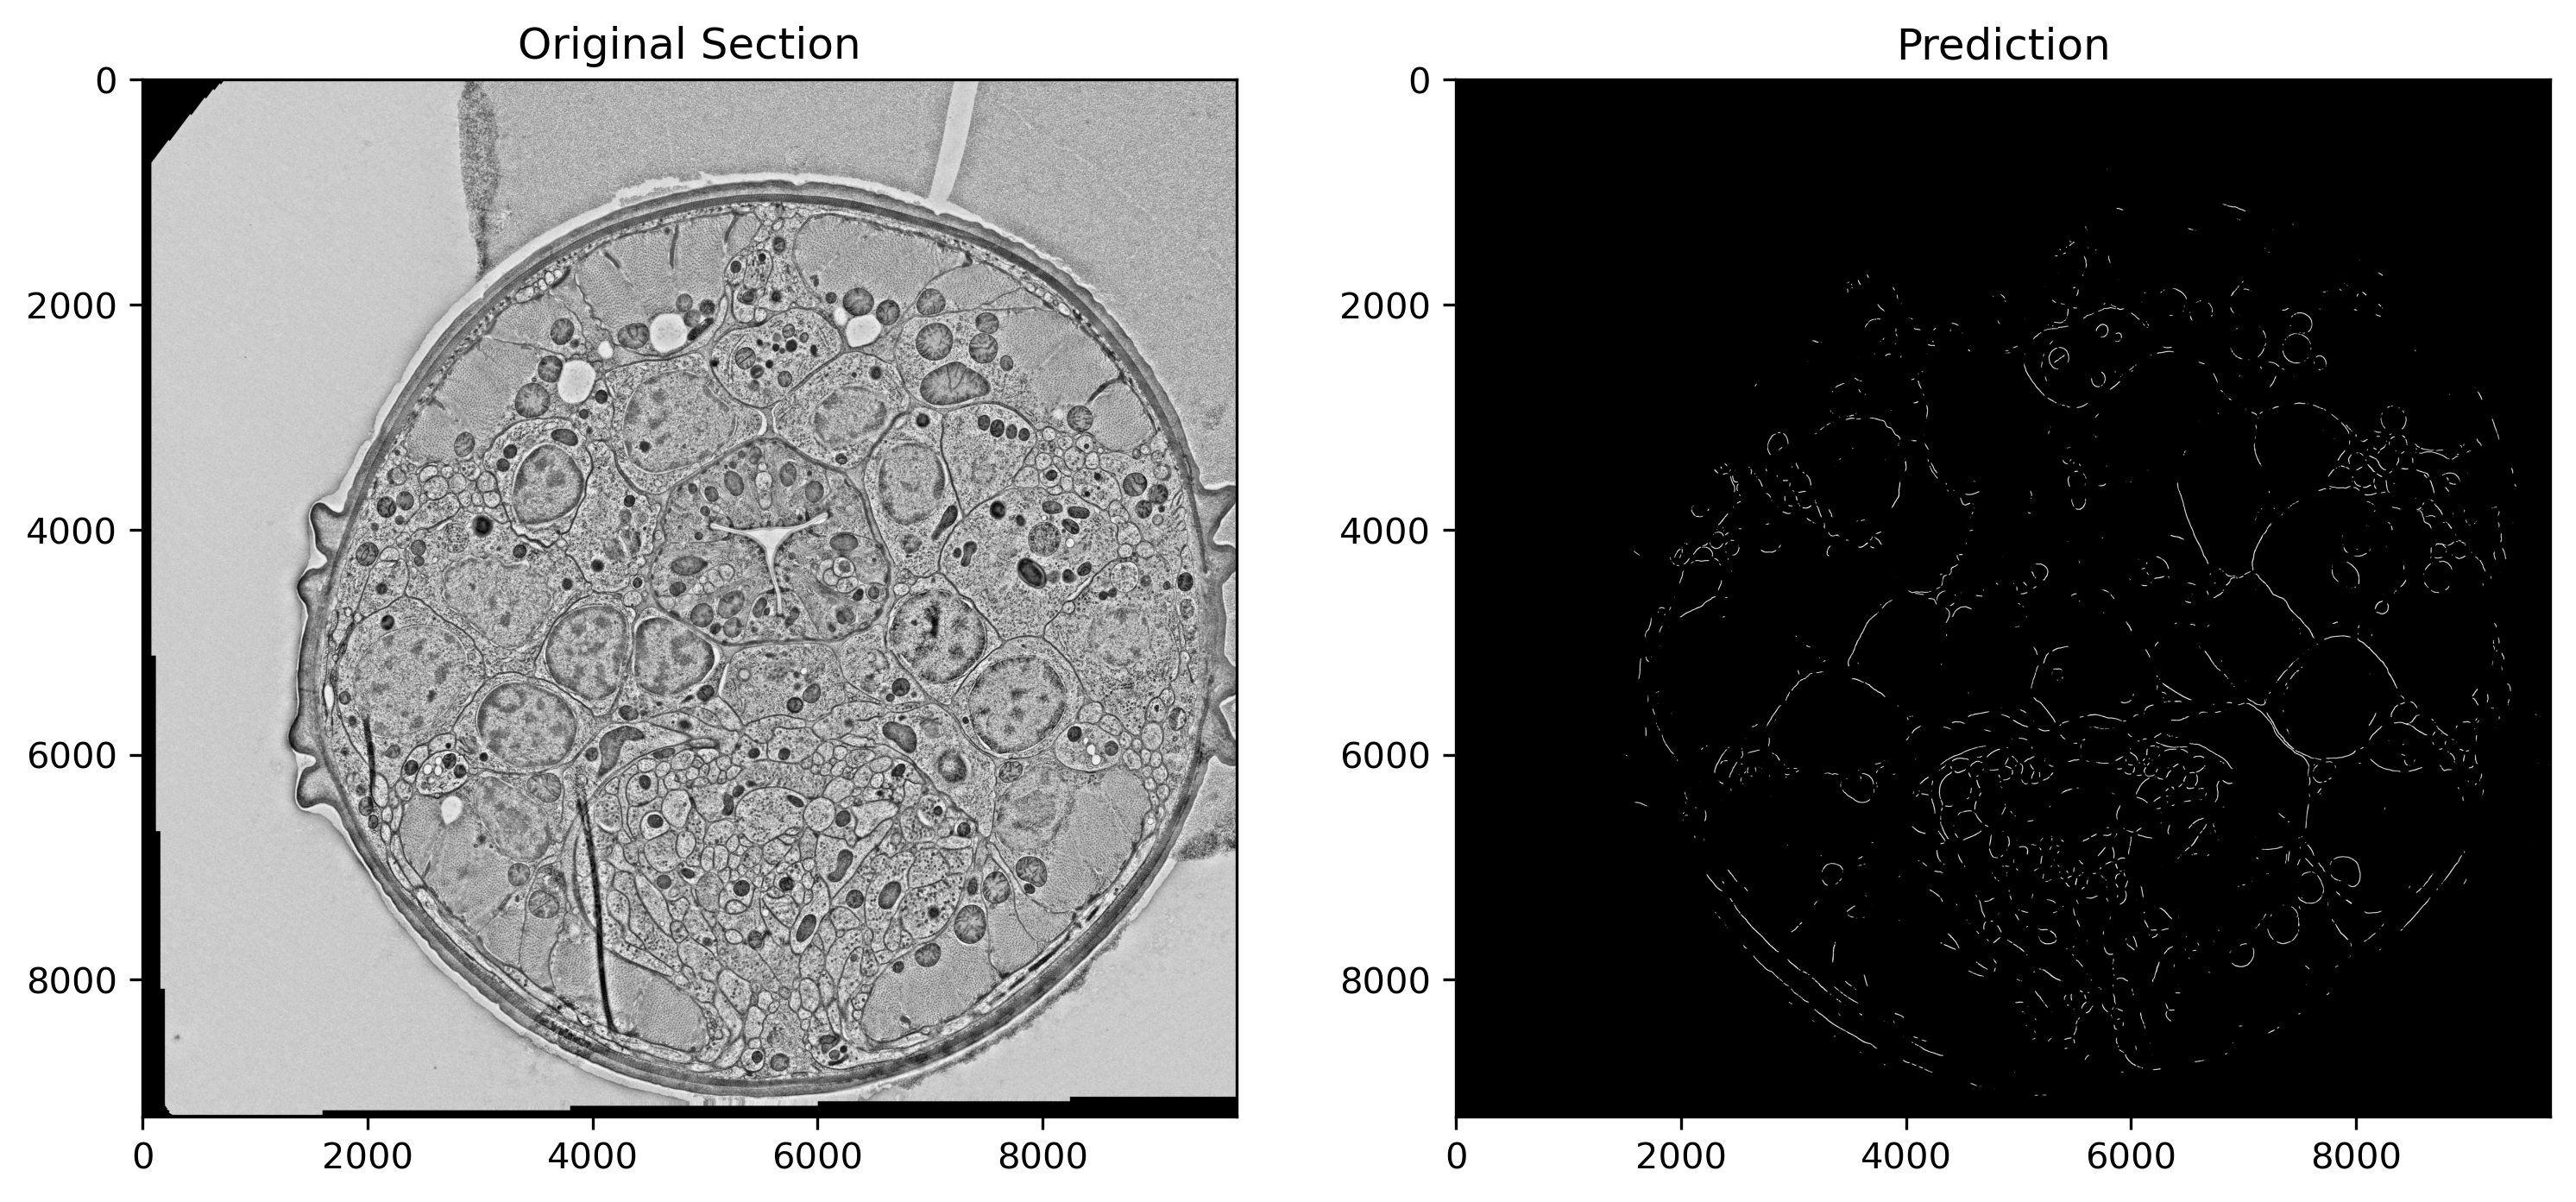

In [68]:
import matplotlib.pyplot as plt
import cv2

section_path = "/mnt/e/Tommy/SEM_dauer_1/Sections/SEM_dauer_1_export_s250.png"
prediction_path = "/mnt/e/Tommy/SEM_dauer_1/Predictions/3D/SEM_dauer_1_export_s250_pred.png"

section = cv2.imread(section_path, cv2.IMREAD_GRAYSCALE)
prediction = cv2.imread(prediction_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12, 6), dpi=300)
plt.subplot(121)
plt.title("Original Section")
plt.imshow(section, cmap='gray')
plt.subplot(122)
plt.title("Prediction")
plt.imshow(prediction, cmap='gray')
plt.show()

In [ ]:
pred2 = cv2.cvtColor(prediction, cv2.COLOR_GRAY2BGR)
pred2[prediction == 255] = [0, 60, 255] #Blue
pred_overlay = cv2.addWeighted(cv2.cvtColor(section, cv2.COLOR_GRAY2BGR), 1, pred2, 1, 0)
plt.figure(dpi=1000)
plt.imshow(pred_overlay)
plt.title("Overlay")
plt.axis('off')
plt.show()

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread("/mnt/e/Tommy/SEM_dauer_1/Neurons/SEM_dauer_1_export_s200_neuron.png", cv2.IMREAD_UNCHANGED)
#plt.imshow(img, cmap='gray', vmax=50)
print(np.unique(img, return_counts=True))

(array([  0,   4,   5,   6,   8,   9,  10,  11,  12,  15,  16,  17,  19,
        22,  23,  25,  27,  28,  30,  31,  32,  34,  36,  37,  38,  39,
        40,  41,  43,  44,  45,  50,  51,  53,  54,  56,  59,  60,  62,
        63,  66,  67,  68,  72,  73,  74,  75,  76,  77,  79,  80,  81,
        83,  84,  86,  87,  89,  90,  91,  93,  95,  97,  99, 101, 104,
       105, 106, 107, 108, 109, 112, 113, 114, 115, 116, 117, 119, 120,
       121, 122, 125, 127, 129, 130, 131, 133, 134, 136, 138, 139, 141,
       142, 143, 146, 148, 150, 151, 152, 153, 154, 156, 158, 159, 160,
       162, 167, 168, 169, 170, 171, 173, 174, 176, 178, 179, 181, 182,
       184, 185, 186, 188, 189, 191, 192, 194, 196, 198, 199, 200, 203,
       204, 205, 206, 207, 209, 211, 212, 213, 214, 216, 217, 218, 219,
       220, 221, 222, 223, 224, 227, 228, 231, 233, 234, 235, 237, 238,
       239, 240, 242, 243, 244, 245, 249, 250, 251, 252, 253, 255, 256,
       257, 258, 260, 261, 262, 263, 264, 265, 266, 267, 268, 2

In [37]:
img2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(8328, 9360), dtype=uint16)